In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/urban.csv')

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [4]:
imputer = KNNImputer(n_neighbors=5)

# Apply imputer to the dataframe (excluding non-numeric columns)
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df[df_numeric.columns] = imputer.fit_transform(df_numeric)

In [5]:
df_categorical = df.select_dtypes(include=['object', 'category'])

for col in df_categorical.columns:
    df[col] = df[col].fillna(df[col].mode()[0])

df = df.drop(columns=
                    [
                    'datetime', 'sunrise', 'sunset', 
                    'preciptype', 'snowdepth', 'stations', 
                    'Condition_Code', 'conditions' ,
                    'description', 'icon', 'source', 
                    'City', 'Season', 'Day_of_Week',
                    'sunriseEpoch','sunsetEpoch','datetimeEpoch'
                    ]
            )


In [6]:
categorical_cols = df.select_dtypes(include=['object', 'category'])

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

In [8]:
X = df.drop(columns=['Health_Risk_Score'],axis=1)
Y = df['Health_Risk_Score']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestRegressor(n_estimators=120, random_state=29)

rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=120, random_state=29)

C:\Users\srsin\AppData\Local\Temp\ipykernel_9568\3007604222.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette='plasma')


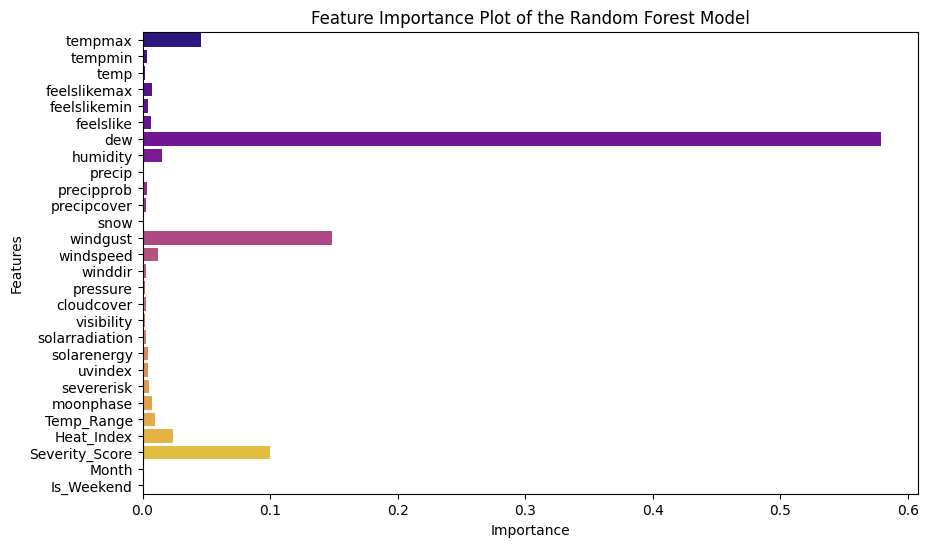

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, palette='plasma')
plt.title('Feature Importance Plot of the Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

#### features to keep
- tempmax
- tempmin
- temprange
- dew
- humidity
- windgust
- windspeed
- UVindex
- heat index
- severity score

#### features to drop
- temp
- feelslikemax
- feelslikemin
- feelslike
- precip
- precipprob
- precipcover
- snow
- winddir
- pressure
- cloudcover
- visibility
- solarradiation
- solarenergy
- severrisk
- moonphase
- month
- is_weekend